# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: J. Vicente Onetto
- Nombre de alumno 2: Renzo Zanca

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/RenzoZanca/MDS7202/tree/lab5)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento se usan para ajustar el modelo (aprender patrones), mientras que los de validación se usan para evaluar su desempeño en datos no vistos y evitar sobreajuste.

2. En aprendizaje no supervisado no tenemos etiquetas (targets) que indiquen la clase real de cada observación. Esto implica dos retos fundamentales. Primero, no tenemos una clase "correcta" o "verdad", por lo que no podemos ajustar o enseñar al modelo como lo haríamos en aprendi zaje supervisado o reforzado. Segundo, al no haber una "verdad" (ground-truth), no podemos calcular métricas tradicionales como accuracy, recall, etc... Debemos recurrir a medidas indirectas como por ejemplo Silhoutte o ya a la validación de un experto.

3. La matriz de confusión muestra el número de aciertos y errores del modelo por cada clase. Esta permite visualizar gráficamente las clases en que el valor real y lo que predice el modelo coinciden y las clases que difieren. Es una tabla que cruza los valores reales vs. las predicciones.

4. Métricas: Considerando
TP: True positive (Real positivo),
FT: False Positive (Falso positivo),
FN: False Negative (Falso negativo),
TN: True Negative (Real negativo),

- Accuracy: $ \frac{TP + TN}{TP+FP+FN+TN}$
>Fracción de aciertos globales tanto reales positivos como reales negativos


- Precision (clase positiva):  $\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$
> El porcentaje de reales positivos. De todas las veces que el modelo predijo positivo , cuantos eran realmente ?

- Recall (sensibilidad):
$\text{recall} = \dfrac{TP}{TP + FN}$
>El porcentaje de los True positives que nuestro modelo detectó del universo total de datos. Se busca minimizar los False Negatives

- F1-score:  $F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$
>Una media entre la precisión y el recall. Castiga mucho cuando una métrica es muy baja.




5. Para elegir una métrica se considera la regla general de que si se quieren evitar falsos positivos se prioriza precision, mientras que si se evitan falsos negativos se usa recall.

*   Mantenimiento predictivo de maquinaria pesada: Recall (importa no dejar fallas sin detectar). Si el mantenimiento es costoso, se puede usar f1-score, para que precision entre en juego y no se mantengan tantas maquinas en casos innecesarios.
*   Detección de enfermedades altamente contagiosas: Recall (es crítico detectar todos los casos posibles y evitar a toda costa los falsos negativos).
*   Aprobación de créditos de alto riesgo: Precision (es importante no aprobar créditos a personas riesgosas).
*   Detección de crímenes: Recall (prioridad en detectar todos los crímenes posibles).


6. La calibración de un modelo es el proceso de ajustar las probabilidades que entrega un clasificador para que estas reflejen fielmente la frecuencia real de ocurrencia de la clase positiva. Un modelo perfectamente calibrado cumple que, de todas las instancias a las que predice probabilidades de p, aproximadamente el p% sean realmente positivas. Sirve por ejemplo, para calcular valores esperados de forma confiable o calcular niveles de certidumbre.




# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [43]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount= True)
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [44]:
# carga de dataframe:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/stats_players.csv')
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [45]:
# 1:
df_national = df.copy()
df_national['label'] = df_national['National_Position'].apply(lambda x: 0 if pd.isna(x) else 1)

In [46]:
# 2:
df_national['label'].value_counts()

,count
label,
0,16513
1,1075


Notamos que la mayoria de los jugadores del dataframe no son seleccionados nacionales.

In [47]:
# 3:

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

categorical_features = ['Club_Position', 'Preffered_Foot', 'Work_Rate', 'Nationality']
numerical_features = df.select_dtypes(include='int64').columns.tolist()

numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Llena categorías faltantes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Convierte a valores numéricos
])

# ColumnTransformer
col_transformer = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

4: Transformaciones:



*   **Variables categóricas:** Aplicamos un imputer simple para evitar casos faltantes (es solo un caso según reporte) y realizamos un one-hot encoding para convertir a datos númericos que el modelo pueda entender.
*  **Variables numéricas:** En primera instancia parece no tan necesario preprocesar, pues los datos tienen un comportamiento más o menos normal, no poseen valores nulos y no hay outliers extremos. Además los modelos de clasificación con árboles no requieren de métricas, por lo que no es necesario a priori estandarizar. Para asegurarse se aplica un MinMax scaler, con el fin de evitar distintas escalas en variables como age, height y las habilidades.
*  **Variables no consideradas:** En primer lugar no consideramos el nombre en las transformaciones, pues no aportaria mucha información al modelo y aumentaría drásticamente la dimensionalidad de este. Tampoco consideramos la variable national_position, pues la etiqueta del modelo es construida a partir de esta, generando una correlación muy directa que puede provocar que el modelo solo considere esta variable.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [48]:
# 1:

from sklearn.model_selection import train_test_split
X = df_national.drop(columns=['National_Position', 'Name', 'label']) # eliminar variables que no son de interés y la etiqueta
y = df_national['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify para evitar desbalance


In [49]:
# 2:

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# parametros para evitar efectos de desbalance
n_positive = y_train.sum()
n_negative = len(y_train) - n_positive

pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier(
        scale_pos_weight=(n_negative / n_positive),
        max_depth=8,
        alpha=1.5,
        random_state=42
    ))
])

pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier(
        is_unbalance=True,
        max_depth=8,
        reg_alpha=1.5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [50]:
# 3:

xgboost = pipeline_xgboost.fit(X_train, y_train)
lightgbm = pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [51]:
# 1:

from sklearn.metrics import classification_report, confusion_matrix

def calcular_metricas(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return accuracy, precision, recall

y_pred_xgboost = xgboost.predict(X_test)
y_pred_lightgbm = lightgbm.predict(X_test)

# XGBoost
print("XGBoost:")
acc_xgb, prec_xgb, rec_xgb = calcular_metricas(y_test, y_pred_xgboost)
print(f"Accuracy: {acc_xgb:.4f}")
print(f"Precision (clase positiva): {prec_xgb:.4f}")
print(f"Recall (clase positiva): {rec_xgb:.4f}")
print(classification_report(y_test, y_pred_xgboost))

# LightGBM
print("\nLightGBM:")
acc_lgb, prec_lgb, rec_lgb = calcular_metricas(y_test, y_pred_lightgbm)
print(f"Accuracy: {acc_lgb:.4f}")
print(f"Precision (clase positiva): {prec_lgb:.4f}")
print(f"Recall (clase positiva): {rec_lgb:.4f}")
print(classification_report(y_test, y_pred_lightgbm))


XGBoost:
Accuracy: 0.9426
Precision (clase positiva): 0.5243
Recall (clase positiva): 0.6512
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3303
           1       0.52      0.65      0.58       215

    accuracy                           0.94      3518
   macro avg       0.75      0.81      0.78      3518
weighted avg       0.95      0.94      0.95      3518


LightGBM:
Accuracy: 0.9076
Precision (clase positiva): 0.3878
Recall (clase positiva): 0.8837
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3303
           1       0.39      0.88      0.54       215

    accuracy                           0.91      3518
   macro avg       0.69      0.90      0.74      3518
weighted avg       0.95      0.91      0.92      3518



2: El valor de accuracy es para ambas clases y computa cuantos jugadores fueron correctamente clasificados, tanto para seleccionados y no seleccionados. El valor de precision nos responde la pregunta ¿De los jugadores que predice el modelo como seleccionados, cuántos realmente lo son? Por otro lado el recall de la clase positiva responde a ¿De todos los jugadores realmente seleccionados, cuántos detecta el modelo?

La baja cantidad de ejemplos para la clase positiva aumenta negativamente al desempeño del modelo alcanzando resultados no tan altos. Si solo se busca maximizar la accuracy, el modelo puede llegar a malos resultados en el que solo elije la clase mayoritaria. Esto hace que baje el precision y recall al no detectar correctamente la clase positiva por tener menos ejemplos.

3: La métrica más adecuada para comparar es el f1-score de la clase positiva, pues considera tanto precision y recall en los casos de más dificultad para el modelo (clase minoritaria). Con esto en mente, el modelo de xgboost alcanza un valor superior (0.58) haciendolo un mejor modelo.

EXTRA: Implementar subsampling para resolver el desbalance de clases

In [52]:
pos = df_national[df_national['label'] == 1]
neg = df_national[df_national['label'] == 0].sample(n=len(pos), random_state=42)
df_subsample = pd.concat([pos, neg])

X_sub = df_subsample.drop(columns=['National_Position', 'Name', 'label'])
y_sub = df_subsample['label']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42, stratify=y_sub)

n_positive = y_train_sub.sum()
n_negative = len(y_train_sub) - n_positive

xgboost_sub = pipeline_xgboost.fit(X_train_sub, y_train_sub)
lightgbm_sub = pipeline_lightgbm.fit(X_train_sub, y_train_sub)


y_pred_xgboost_sub = xgboost_sub.predict(X_test_sub)
y_pred_lightgbm_sub = lightgbm_sub.predict(X_test_sub)

# XGBoost
print("XGBoost:")
acc_xgb, prec_xgb, rec_xgb = calcular_metricas(y_test_sub, y_pred_xgboost_sub)
print(f"Accuracy: {acc_xgb:.4f}")
print(f"Precision (clase positiva): {prec_xgb:.4f}")
print(f"Recall (clase positiva): {rec_xgb:.4f}")
print(classification_report(y_test_sub, y_pred_xgboost_sub))

# LightGBM
print("\nLightGBM:")
acc_lgb, prec_lgb, rec_lgb = calcular_metricas(y_test_sub, y_pred_lightgbm_sub)
print(f"Accuracy: {acc_lgb:.4f}")
print(f"Precision (clase positiva): {prec_lgb:.4f}")
print(f"Recall (clase positiva): {rec_lgb:.4f}")
print(classification_report(y_test_sub, y_pred_lightgbm_sub))


[LightGBM] [Info] Number of positive: 860, number of negative: 860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2386
[LightGBM] [Info] Number of data points in the train set: 1720, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

Notamos que al hacer subsampling de la clase negativa aumentan considerablemente las métricas de desempeño. Para este escenario se obtiene un mejor f1-score en el modelo LigthGBM con 0.85 en la clase positiva

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [53]:
# 1:

position_map = {
    **dict.fromkeys(['GK'], 'arquero'),
    **dict.fromkeys(['RB', 'CB', 'LB'], 'defensa'),
    **dict.fromkeys(['RWB', 'CDM', 'LWB'], 'central_defensa'),
    **dict.fromkeys(['RM', 'CM', 'LM'], 'central'),
    **dict.fromkeys(['RW', 'CAM', 'LW'], 'central_ataque'),
    **dict.fromkeys(['ST', 'CF'], 'ataque')
}

df_positions = df.copy()
df_positions['label'] = df_positions['Club_Position'].map(position_map).fillna('Otro')
df_positions = df_positions[df_positions['label'] != 'Otro']

In [54]:
# 2:
df_positions['label'].value_counts()

,count
label,
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [55]:
# 3:
X_pos = df_positions.drop(columns=['Club_Position', 'National_Position', 'Name', 'label'])
y_pos = df_positions['label']

X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42, stratify=y_pos)

In [56]:
numerical_features_pos = X_pos.select_dtypes(include='number').columns.tolist()
categorical_features_pos = ['Preffered_Foot', 'Work_Rate', 'Nationality']

numerical_pipeline_pos = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline_pos = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

col_transformer_pos = ColumnTransformer([
    ('num', numerical_pipeline_pos, numerical_features_pos),
    ('cat', categorical_pipeline_pos, categorical_features_pos)
])


# 2 (Redefined with the new col_transformer_pos):
pipeline_xgboost_pos = Pipeline([
    ('preprocessor', col_transformer_pos),  # Use the new ColumnTransformer
    ('classifier', XGBClassifier(
        max_depth=8,
        alpha=1.5,
        random_state=42
    ))
])

pipeline_lightgbm_pos = Pipeline([
    ('preprocessor', col_transformer_pos), # Use the new ColumnTransformer
    ('classifier', LGBMClassifier(
        max_depth=8,
        reg_alpha=1.5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])


In [57]:
label_to_int = {
    'arquero': 0,
    'defensa': 1,
    'central_defensa': 2,
    'central': 3,
    'central_ataque': 4,
    'ataque': 5
} # labels, pues xgboost no acepta strings

xgboost_pos = pipeline_xgboost_pos.fit(X_train_pos, y_train_pos.map(label_to_int))
lightgbm_pos = pipeline_lightgbm_pos.fit(X_train_pos, y_train_pos)

y_pred_xgboost_pos = pipeline_xgboost_pos.predict(X_test_pos)
y_pred_lightgbm_pos = pipeline_lightgbm_pos.predict(X_test_pos)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2392
[LightGBM] [Info] Number of data points in the train set: 3151, number of used features: 77
[LightGBM] [Info] Start training from score -1.828938
[LightGBM] [Info] Start training from score -2.214833
[LightGBM] [Info] Start training from score -1.469303
[LightGBM] [Info] Start training from score -1.913438
[LightGBM] [Info] Start training from score -2.937481
[LightGBM] [Info] Start training from score -1.205349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [58]:
# XGBoost
print("XGBoost:")
print(classification_report(y_test_pos.map(label_to_int), y_pred_xgboost_pos))

# LightGBM
print("\nLightGBM:")
print(classification_report(y_test_pos, y_pred_lightgbm_pos))

XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.84      0.96      0.90       236
           2       0.36      0.19      0.25        42
           3       0.59      0.59      0.59       182
           4       0.51      0.40      0.44       116
           5       0.75      0.85      0.80        86

    accuracy                           0.75       788
   macro avg       0.68      0.67      0.66       788
weighted avg       0.72      0.75      0.73       788


LightGBM:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.79      0.83      0.81        86
        central       0.59      0.64      0.62       182
 central_ataque       0.51      0.40      0.44       116
central_defensa       0.33      0.14      0.20        42
        defensa       0.84      0.95      0.89       236

       accuracy                     

4: Notamos que ambos modelos poseen desempeños muy similares, clasificando correctamente en el 75% de los casos. En promedio los modelos tuvieron un precision de 0.68 y recall de 0.665. Se destaca su capacidad para predecir las categorias arquero y defensa, pero fallando en la categoria central defensa.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [59]:
!pip install pycaret[full]

In [60]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

df_jere = df_national.copy()
df_jere.drop(columns=['National_Position', 'Name'], inplace=True)

# 2) Setup
exp = setup(
    data=df_jere,
    target="label",
    train_size=0.8,
    session_id=42,
    normalize=False,         # ya preprocesamos manualmente
    verbose=False,           # para no ver toda la salida
)

# 3) Comparar solo modelos de árbol
tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
best = compare_models(
    include=tree_models,
    sort='Precision',       # priorizamos baja tasa de falsos positivos
    n_select=1
)

print("Mejor modelo según precision (menos FP):", best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9478,0.9437,0.2512,0.7100,0.3690,0.3484,0.4012,3.3960
et,Extra Trees Classifier,0.9435,0.9440,0.1372,0.7032,0.2277,0.2119,0.2921,3.9160
lightgbm,Light Gradient Boosting Machine,0.9517,0.9594,0.4337,0.6649,0.5232,0.4990,0.5125,2.2220
catboost,CatBoost Classifier,0.9517,0.9594,0.4326,0.6630,0.5224,0.4983,0.5114,13.5130
xgboost,Extreme Gradient Boosting,0.9491,0.9574,0.4360,0.6224,0.5114,0.4855,0.4948,0.7950
dt,Decision Tree Classifier,0.9303,0.7080,0.4547,0.4356,0.4437,0.4067,0.4074,0.3650


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Mejor modelo según precision (menos FP): RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


1. Notemos que Random Forest (rf) es el que tiene la precisión más alta 0.7100. Esto quiere decir que de todos los jugadores que predice como seleccionados, un 29% son falsos positivos. Además, es relativamente rápido con solo 2.857 segundos. Tiene un recall moderado, pero para este caso no es tan relevante puesto que se busca priorizar minimizar los falsos positivos. Este clasificador combina la máxima precisión y una predicción en tiempo decente.


2
- Decision Tree (dt):
Un árbol de decisión es un modelo que particiona recursivamente el espacio de características mediante preguntas del tipo “¿feature X ≤ t?” para separar lo más puramente posible las clases. Es muy rápido en inferencia y fácil de interpretar, pero en profundidad alta tiende a sobreajustarse.

- Random Forest (rf):
Un bosque aleatorio construye un conjunto de
N árboles de decisión entrenados sobre bootstrap samples (muestras aleatorias con reemplazo) del dataset. Además, en cada división, en lugar de probar todas las variables, solo considera un subconjunto aleatorio de ellas. Luego promedia (regresión) o vota (clasificación) las predicciones de todos los árboles, reduciendo drásticamente la varianza y el sobreajuste del árbol único.

- Extra Trees(et):
Los Extra Trees son también un conjunto de árboles, pero llevan la aleatoriedad un paso más allá, Se entrenan sobre el dataset completo (sin bootstrap). Para cada nodo, se seleccionan al azar tanto la característica como el umbral de corte (no se buscan métricas de impureza para elegir el mejor split).
Esto los hace muy rápidos de entrenar y algo más sesgados, pero con baja varianza y robustos al ruido.



In [61]:
#3

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Confusión Matrix:

Notamos que tenemos 3276 de 3434 son verdaderos negativos, teniendo un alto desempeño. Por otro lado, 57 de 84 son verdaderos positivos, presentando más dificultades para predecir la clase positiva.


Threshold:

Del gráfico podemos notar que el threshold por defecto (0.27) está muy cercano al punto que maximiza f1, sin embargo, como nuestro objetivo es la precision, puede no ser el umbral ideal.


Feature Importance:

Notamos que la variable con mayor importancia es nationality, esto puede estar causado por las nacionalidades con pocos jugadores, en donde en mayoria aparezcan jugadores que tambien son seleccionados nacionales, haciendolo un factor clave para el modelo. Luego tenemos como importancia ciertas habilidades de los jugadores como reactions, stamina, dribling, ball control, que pueden ser un indicador de caracteristicas importantes en los jugadores, determinando si pueden ser seleccionados nacionales si tienen buen desempeño en estas habilidades.

Learning Curve:

La curva muestra un buen resultado, en donde el score de validación aumenta progresivamente con el número de instancias, llegando a valores cercanos a 0.95.

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# --- 1. Cargar y dividir los datos ---
df = pd.read_csv('/content/drive/MyDrive/stats_players.csv')
df["label"] = df["National_Position"].notna().astype(int)
X = df.drop(columns=["National_Position","Name","label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. Preprocesamiento ---
num_feats = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_feats = ["Club_Position","Preffered_Foot","Work_Rate","Nationality"]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # ← instancia, no string
    ("scaler", MinMaxScaler()),
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # ← instancia
    ("ohe", OneHotEncoder(handle_unknown="ignore")),
])

ct = ColumnTransformer([
    ("num", num_pipe, num_feats),
    ("cat", cat_pipe, cat_feats),
])

# Ahora sí:
X_tr = ct.fit_transform(X_train)
X_ts = ct.transform(X_test)
feature_names = ct.get_feature_names_out()

# --- 3. Entrenar XGBoost con todas las features ---
model_full = XGBClassifier(use_label_encoder=False,
                           eval_metric="logloss",
                           random_state=42)
model_full.fit(X_tr, y_train)
y_pred_full = model_full.predict(X_ts)
metrics_full = {
    "f1": f1_score(y_test, y_pred_full),
    "precision": precision_score(y_test, y_pred_full),
    "recall": recall_score(y_test, y_pred_full),
    "accuracy": accuracy_score(y_test, y_pred_full),
}

# --- 4. Obtener importancia de features (gain) ---
imp = model_full.get_booster().get_score(importance_type="gain")
imp_df = pd.DataFrame({
    "feature": list(imp.keys()),
    "gain": list(imp.values())
}).sort_values("gain", ascending=False).reset_index(drop=True)

# --- 5. Recursive Feature Elimination manual ---
results = []
for k in range(5, len(feature_names)+1, 5):
    top_feats = imp_df["feature"].iloc[:k].values   # e.g. ['f0','f3','f11',…]
    idx = [int(f[1:]) for f in top_feats]           # [0, 3, 11, …]
    Xk_tr = X_tr[:, idx]
    Xk_ts = X_ts[:, idx]
    m = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    m.fit(Xk_tr, y_train)
    preds_k = m.predict(Xk_ts)
    results.append({'n_features': k, 'f1': f1_score(y_test, preds_k)})

res_df = pd.DataFrame(results)


# --- 6. Elegir N tal que f1 ≥ 0.98·f1_full ---
threshold = metrics_full["f1"] * 0.98
candidates = res_df[res_df["f1"] >= threshold]
N = int(candidates.iloc[0]["n_features"]) if not candidates.empty else len(feature_names)

# --- 7. Entrenar con top-N y comparar ---
topN = imp_df["feature"].iloc[:N].values   # ej. ['f0','f3','f11', …]
idxN = [int(f[1:]) for f in topN]          # [0, 3, 11, …]
model_red = XGBClassifier(use_label_encoder=False,
                          eval_metric="logloss",
                          random_state=42)
model_red.fit(X_tr[:, idxN], y_train)
y_pred_red = model_red.predict(X_ts[:, idxN])
metrics_red = {
    "f1": f1_score(y_test, y_pred_red),
    "precision": precision_score(y_test, y_pred_red),
    "recall": recall_score(y_test, y_pred_red),
    "accuracy": accuracy_score(y_test, y_pred_red),
}

print("### Métricas modelo completo ###\n", metrics_full)
print("### Métricas modelo reducido ###\n", metrics_red)
print(f"Se quedaron N={N} features de {len(feature_names)} originales.")


### Métricas modelo completo ###
 {'f1': 0.42771084337349397, 'precision': 0.6068376068376068, 'recall': 0.3302325581395349, 'accuracy': 0.9459920409323479}
### Métricas modelo reducido ###
 {'f1': 0.4235294117647059, 'precision': 0.576, 'recall': 0.33488372093023255, 'accuracy': 0.9442865264354747}
Se quedaron N=30 features de 226 originales.


5.

>¿El rendimiento con las características seleccionadas es similar al del modelo original?

> Sí. Al recortar de 226 a 30 variables críticas, el F1 sólo cayó de 0.4277 a 0.4235 (–0.0042), y la accuracy de 0.9460 a 0.9443 (–0.0017). Ese pequeño descenso muestra que la mayoría del poder predictivo seguía concentrado en esas 30 features, manteniendo casi intacta la precisión y la robustez del modelo original.

> ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.

> Los principales beneficios son:
 - Simplicidad, menos features resultan en arboles y pipelines más cortos.
 - Velocidad, se reduce el tiempo de entrenamiento e inferencia debido a que cada split evalúa un menor numero de columnas.
 - Generalización, al quitar variables correlacionadas o ruidosas, se atenúa el overfitting.
 - Mantenimiento, un modelo más simple es más facil de mantener y depurar que uno con más inputs.


> Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo.

> Si, con solo 30 variables clave en lugar de 226, resulta trivial describir “por qué” y “en qué orden” el árbol decide. Las gráficas de importancia o dependencia parcial de cada feature también se simplifican puesto que se enfocan en solo las nuevas 30 variables.



### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [63]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

In [64]:
probs_uncalibrated = model_red.predict_proba(X_ts[:, idxN])[:, 1]
brier_uncalibrated = brier_score_loss(y_test, y_pred_red)
print(f"Brier Score sin calibrar: {brier_uncalibrated:.4f}")

Brier Score sin calibrar: 0.0557


In [65]:
# calibrar modelo:
calibrated_model = CalibratedClassifierCV(model_red, method='isotonic', cv=5)
calibrated_model.fit(X_tr[:, idxN], y_train)

CalibratedClassifierCV(cv=5, ensemble=True,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='binary:logistic', ...),
                       method='isotonic', n_jobs=None)

In [66]:
# medir el cambio:
probs_calibrated = calibrated_model.predict_proba(X_ts[:, idxN])[:, 1]
brier_calibrated = brier_score_loss(y_test, probs_calibrated)
print(f"Brier Score calibrado: {brier_calibrated:.4f}")

Brier Score calibrado: 0.0398


Notamos que tras la calibración, el Brier score pasa de 0.0557 a 0.0398, indicando que al calibrar se ha reducido la diferencia cuadritica promedio de las probabilidades predichas y las reales.

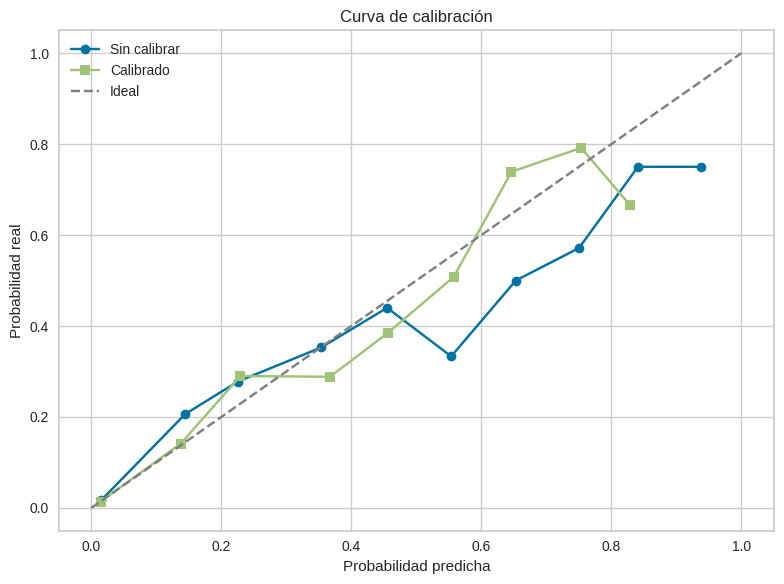

In [67]:
import matplotlib.pyplot as plt

def plot_calibration(y_true, probs1, probs2, name1='Sin calibrar', name2='Calibrado'):
    plt.figure(figsize=(8, 6))

    prob_true1, prob_pred1 = calibration_curve(y_true, probs1, n_bins=10)
    prob_true2, prob_pred2 = calibration_curve(y_true, probs2, n_bins=10)

    plt.plot(prob_pred1, prob_true1, marker='o', label=name1)
    plt.plot(prob_pred2, prob_true2, marker='s', label=name2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')

    plt.xlabel('Probabilidad predicha')
    plt.ylabel('Probabilidad real')
    plt.title('Curva de calibración')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_calibration(y_test, probs_uncalibrated, probs_calibrated)

La gráfica muestra que las probabilidades calibradas se acercan más a la línea ideal, especialmente en los valores altos, lo cual confirma que el modelo calibrado representa mejor la incertidumbre real.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>